In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import os

os.environ['WANDB_MODE'] = 'dryrun'
os.environ["TQDM_DISABLE"] = "1"


### Configure API Key

In [ ]:
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

### Install Libraries

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17752, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 17752 (delta 66), reused 36 (delta 36), pack-reused 17643 (from 4)
Receiving objects: 100% (17752/17752), 17.13 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (12056/12056), done.
/content/yolov5/yolov5


In [ ]:
!pip install -q roboflow supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.9 MB/s eta 0:00:00


In [ ]:
HOME = os.getcwd()
print(HOME)

/content/yolov5


### Download Dataset from Roboflow

In [ ]:
from roboflow import download_dataset

dataset = download_dataset(
    'https://universe.roboflow.com/aegis/pothole-detection-i00zy/dataset/2',
    'yolov5'
)

dataset_path = dataset.location  # path to dataset folder
dataset_path


loading Roboflow workspace...
loading Roboflow project...


'/content/yolov5/Pothole-Detection--2'

In [ ]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 60 \
  --data {dataset_path}/data.yaml \
  --weights yolov5s.pt \
  --name pothole_yolov5_finetune \
  --cache


Streaming output truncated to the last 5000 lines.
      23/59      4.39G    0.03012    0.02489          0        108        640:   3% 2/65 [00:00<00:16,  3.88it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      23/59      4.39G    0.02933    0.02228          0         75        640:   5% 3/65 [00:00<00:16,  3.67it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      23/59      4.39G    0.02954    0.02372          0        134        640:   6% 4/65 [00:01<00:17,  3.47it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      23/59      4.39G    0.02944    0.0

In [ ]:
!zip -r /content/YOLOv5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/train.py (deflated 71%)
  adding: content/yolov5/segment/ (stored 0%)
  adding: content/yolov5/segment/train.py (deflated 69%)
  adding: content/yolov5/segment/tutorial.ipynb (deflated 73%)
  adding: content/yolov5/segment/predict.py (deflated 70%)
  adding: content/yolov5/segment/val.py (deflated 67%)
  adding: content/yolov5/yolov5s.pt (deflated 9%)
  adding: content/yolov5/.github/ (stored 0%)
  adding: content/yolov5/.github/ISSUE_TEMPLATE/ (stored 0%)
  adding: content/yolov5/.github/ISSUE_TEMPLATE/feature-request.yml (deflated 62%)
  adding: content/yolov5/.github/ISSUE_TEMPLATE/config.yml (deflated 50%)
  adding: content/yolov5/.github/ISSUE_TEMPLATE/question.yml (deflated 55%)
  adding: content/yolov5/.github/ISSUE_TEMPLATE/bug-report.yml (deflated 61%)
  adding: content/yolov5/.github/workflows/ (stored 0%)
  adding: content/yolov5/.github/workflows/format.yml (deflated 62%)
  adding: content/yolov5/.github/workflo

In [ ]:
from google.colab import files

files.download('/content/YOLOv5.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluate fine-tuned YOLOv5 model




In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/train/pothole_yolov5_finetune/

confusion_matrix.png				    results.png
events.out.tfevents.1764442242.f105a90b8cee.2630.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


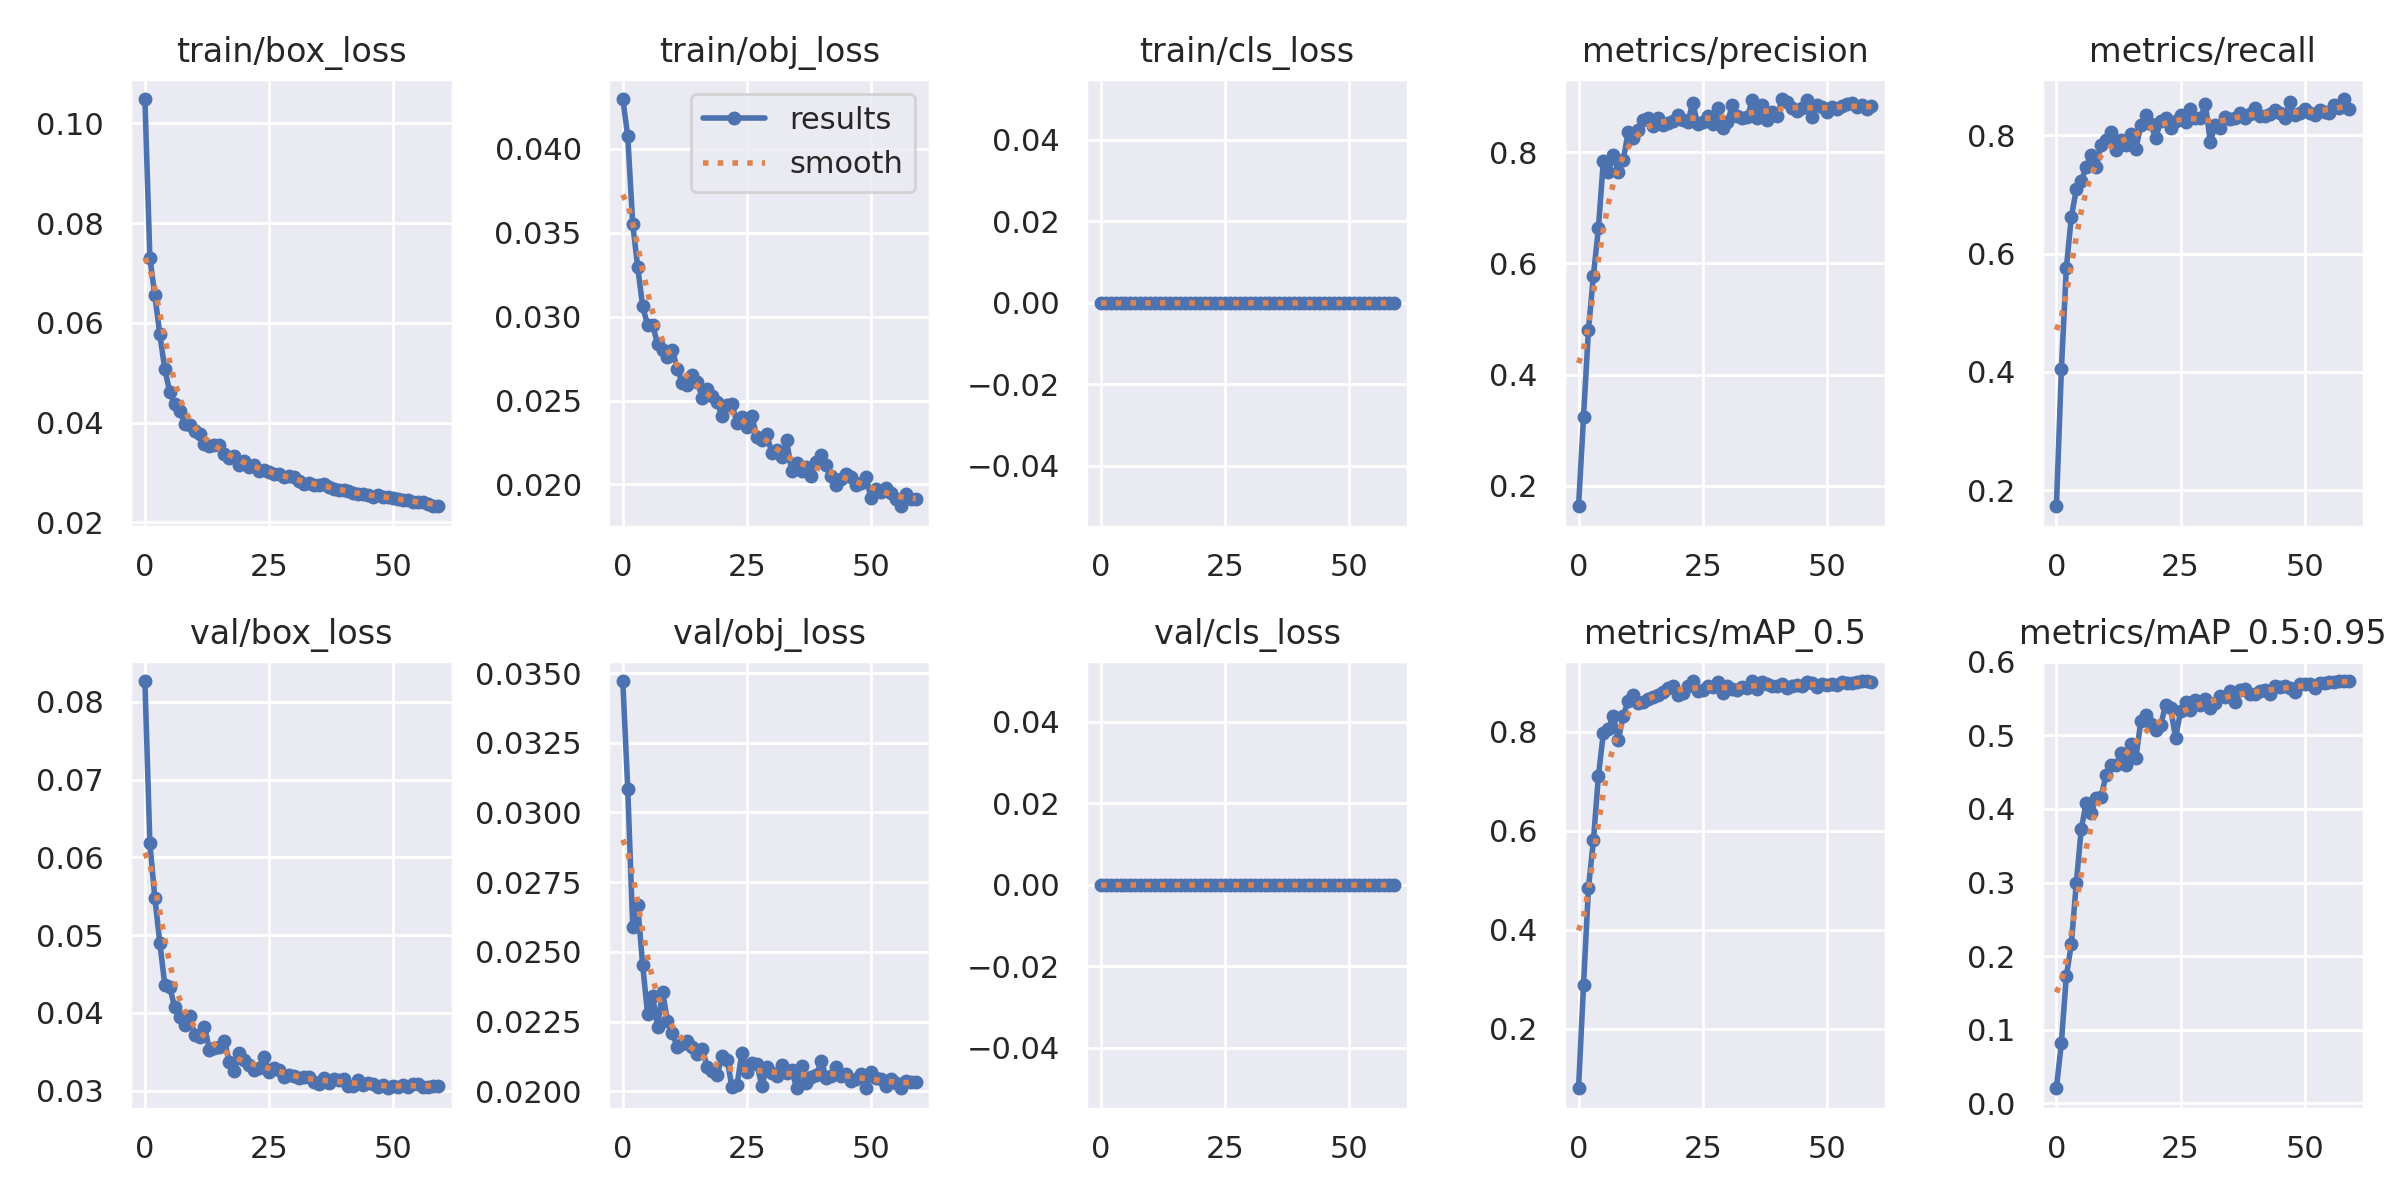

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/train/pothole_yolov5_finetune/results.png', width=1000)

### Loading the best weights to evaluate test set

In [ ]:
import supervision as sv
import torch

# Load dataset
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_path}/test/images",
    annotations_directory_path=f"{dataset_path}/test/labels",
    data_yaml_path=f"{dataset_path}/data.yaml"
)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=f'{HOME}/runs/train/pothole_yolov5_finetune/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-450-g781b9d57 Python-3.12.12 torch-2.9.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### Computing Evaluation Metrics

In [ ]:
from supervision.metrics import MeanAveragePrecision
from supervision.metrics.detection import ConfusionMatrix

predictions = []
targets = []

for _, image, target in ds:
    # YOLOv5 inference – returns one result per image
    results = model(image)

    # Convert YOLOv5 results → Supervision detections
    detections = sv.Detections.from_yolov5(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()
cm  = ConfusionMatrix.from_detections(predictions, targets, iou_threshold=0.5, classes=["pothole"])

tp = cm.matrix[0,0]
fp = cm.matrix[0,1]
fn = cm.matrix[1,0]

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall    = tp / (tp + fn) if (tp + fn) > 0 else 0
f1        = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


In [ ]:
print(f"mAP 50:95: {(map.map50_95)*100:.2f}")
print(f"mAP 50: {(map.map50)*100:.2f}")
print(f"mAP 75: {(map.map75)*100:.2f}")

print(f"\nPrecision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")
print(f"F1-score: {f1*100:.2f}")

mAP 50:95: 40.81
mAP 50: 70.04
mAP 75: 45.13

Precision: 71.82
Recall: 82.10
F1-score: 76.62
